<a href="https://colab.research.google.com/github/noyomedicen/Data-analysis---Contabilidad-APP/blob/main/ContabilidadAPP_data_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
from google.colab import auth
from google.auth import default

try:
  import gspread
except ModuleNotFoundError:
  if 'google.colab' in str(get_ipython()):
    %pip install gspread
  import gspread

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
#Cargamos archivos
benchmarketing = pd.read_csv('/content/drive/MyDrive/Proyectos/Prueba tecnica Alegra/BenchmarkingDeLaIndustria.csv')
financieros = pd.read_csv('/content/drive/MyDrive/Proyectos/Prueba tecnica Alegra/DatosFinancierosIntegrados.csv')
feedback = pd.read_csv('/content/drive/MyDrive/Proyectos/Prueba tecnica Alegra/FeedbackDelCliente.csv')
metricasuso = pd.read_csv('/content/drive/MyDrive/Proyectos/Prueba tecnica Alegra/MetricasDeUsoDelProducto.csv')

In [ ]:
#Creamos una lista de 0 a 10,000 para utilizarlos como los Id de cada usuario
user_id_list = []
for i in range(10000):
  user = 1 + i
  user_id_list.append(user)

In [ ]:
#Creamos un dataframe vacio
df_general = pd.DataFrame()

#Ingresamos las metricas que necesitamos para cada usuario al dataframe creado
for usuario in user_id_list:
  print(usuario)
  df_for = pd.DataFrame()

  #Datos financieros
  user_id = usuario
  revenue = financieros['revenue'][financieros['user_id'] == usuario].sum()
  cost = financieros['cost'][financieros['user_id'] == usuario].sum()
  profit = revenue - cost
  profitpercent = profit/revenue*100

  #Metricas de uso
  usage_time_total = metricasuso['usage_time'][metricasuso['user_id'] == usuario].sum()
  usage_time_mean = metricasuso['usage_time'][metricasuso['user_id'] == usuario].mean()

  user_df = metricasuso[metricasuso['user_id'] == usuario]
  grouped_df = user_df.groupby('feature_used')['usage_time'].sum()
  most_used_feature_1 = grouped_df.sort_values(ascending=False).index[0]
  lest_used_feature_1 = grouped_df.sort_values(ascending=True).index[0]

  #Feedback del usuario
  user_feedback_df = feedback[feedback["user_id"] == usuario]
  feedback_count = user_feedback_df.shape[0]

  positive_feedback_df = feedback[(feedback["user_id"] == usuario) & (feedback["sentiment"] == "positive")]
  positive_feedback = positive_feedback_df.shape[0]

  negative_feedback_df = feedback[(feedback["user_id"] == usuario) & (feedback["sentiment"] == "negative")]
  negative_feedback = negative_feedback_df.shape[0]

  neutral_feedback_df = feedback[(feedback["user_id"] == usuario) & (feedback["sentiment"] == "neutral")]
  neutral_feedback = neutral_feedback_df.shape[0]

  feature_request_feedback_df = feedback[(feedback["user_id"] == usuario) & (feedback["feedback_type"] == "feature_request")]
  feature_request_feedback = feature_request_feedback_df.shape[0]

  general_feedback = feedback[(feedback["user_id"] == usuario) & (feedback["feedback_type"] == "general_feedback")]
  general_feedback = general_feedback.shape[0]

  bug_report = feedback[(feedback["user_id"] == usuario) & (feedback["feedback_type"] == "bug_report")]
  bug_report = bug_report.shape[0]

  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)

1
2
3
4
5
6
7
8
9
10
11


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

12
13
14
15
16
17
18
19
20
21
22


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

23
24
25
26
27
28
29
30
31
32
33


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

34
35
36
37
38
39
40
41
42
43


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

44
45
46
47
48
49
50
51
52
53


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

54
55
56
57
58
59
60
61
62
63
64


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

65
66
67
68
69
70
71
72
73
74
75


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

76
77
78
79
80
81
82
83
84
85
86


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

87
88
89
90
91
92
93
94
95
96


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

97
98
99
100
101
102
103
104
105
106
107


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

108
109
110
111
112
113
114
115
116
117
118


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

119
120
121
122
123
124
125
126
127
128
129


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

130
131
132
133
134
135
136
137
138
139
140


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

141
142
143
144
145
146
147
148
149
150


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

151
152
153
154
155
156
157
158
159
160
161


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

162
163
164
165
166
167
168
169
170
171
172


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

173
174
175
176
177
178
179
180
181
182
183


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

184
185
186
187
188
189
190
191
192
193
194


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

195
196
197
198
199
200
201
202
203
204


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

205
206
207
208
209
210
211
212
213
214
215


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

216
217
218
219
220
221
222
223
224
225


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

226
227
228
229
230
231
232
233
234
235
236


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

237
238
239
240
241
242
243
244
245
246
247


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

248
249
250
251
252
253
254
255
256
257
258


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

259
260
261
262
263
264
265
266
267
268
269


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

270
271
272
273
274
275
276
277
278
279
280
281


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

282
283
284
285
286
287
288
289
290
291
292


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

293
294
295
296
297
298
299
300


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

301
302
303
304
305
306
307


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

308
309
310
311
312
313
314


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

315
316
317
318
319
320
321
322


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

323
324
325
326
327
328
329


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

330
331
332
333
334
335


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

336
337
338
339
340
341
342


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

343
344
345
346
347
348
349


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

350
351
352
353
354
355
356


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

357
358
359
360
361
362


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

363
364
365
366
367
368


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

369
370
371
372
373
374
375


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

376
377
378
379
380
381
382


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

383
384
385
386
387
388


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

389
390
391
392
393
394


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

395
396
397
398
399
400
401


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

402
403
404
405
406
407
408


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

409
410
411
412
413
414
415
416
417
418
419


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

420
421
422
423
424
425
426
427
428
429


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

430
431
432
433
434
435
436
437
438
439


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

440
441
442
443
444
445
446
447
448
449
450


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

451
452
453
454
455
456
457
458
459
460
461


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

462
463
464
465
466
467
468
469
470
471
472


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

473
474
475
476
477
478
479
480
481
482


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

483
484
485
486
487
488
489
490
491
492


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

493
494
495
496
497
498
499
500
501
502
503


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

504
505
506
507
508
509
510
511
512
513
514


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

515
516
517
518
519
520
521
522
523
524


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

525
526
527
528
529
530
531
532
533
534
535


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

536
537
538
539
540
541
542
543
544
545
546


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

547
548
549
550
551
552
553
554
555
556
557


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

577
578
579
580
581
582
583
584
585
586


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

587
588
589
590
591
592
593
594
595
596
597


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

598
599
600
601
602
603
604
605
606
607
608

<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 


609
610
611
612
613
614
615
616
617
618


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

619
620
621
622
623
624
625
626
627
628


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

629
630
631
632
633
634
635
636
637
638
639


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

640
641
642
643
644
645
646
647
648
649
650


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

651
652
653
654
655
656
657
658
659
660
661


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

662
663
664
665
666
667
668
669
670
671


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

672
673
674
675
676
677
678
679
680
681
682


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

683
684
685
686
687
688
689
690
691
692


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

693
694
695
696
697
698
699
700
701
702
703


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

704
705
706
707
708
709
710
711
712
713


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

714
715
716
717
718
719
720
721
722
723


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

724
725
726
727
728
729
730
731
732
733


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

734
735
736
737
738
739
740
741
742
743


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

744
745
746
747
748
749
750
751
752
753
754


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

755
756
757
758
759
760
761
762
763
764
765


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

766
767
768
769
770
771
772
773
774
775
776


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

777
778
779
780
781
782
783
784
785
786


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

787
788
789
790
791
792
793
794
795
796
797


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

798
799
800
801
802
803
804
805
806
807
808
809


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

810
811
812
813
814
815
816
817
818
819
820


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

821
822
823
824
825
826
827
828
829
830


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

831
832
833
834
835
836
837
838
839
840


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

841
842
843
844
845
846
847
848
849
850
851


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

852
853
854
855
856
857
858
859
860
861


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

862
863
864
865
866
867
868
869
870
871
872


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

873
874
875
876
877
878
879
880
881
882


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

883
884
885
886
887
888
889
890
891


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

892
893
894
895
896
897
898


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

899
900
901
902
903
904
905
906
907
908
909
910
911


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

912
913
914
915
916
917
918


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

919
920
921
922
923
924
925

<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 


926
927
928
929
930
931


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

932
933
934
935
936
937
938


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

939
940
941
942
943
944
945


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

946
947
948
949
950
951
952


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

953
954
955
956
957
958
959


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

960
961
962
963
964
965
966


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

967
968
969
970
971
972
973


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

974
975
976
977
978
979
980


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

981
982
983
984
985
986


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

987
988
989
990
991
992


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

993
994
995
996
997
998
999


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1000
1001
1002
1003
1004
1005
1006


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1007
1008
1009
1010
1011
1012
1013
1014


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1015
1016
1017
1018
1019
1020
1021
1022
1023
1024


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1025
1026
1027
1028
1029
1030
1031
1032
1033
1034


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1035
1036
1037
1038
1039
1040
1041
1042
1043
1044


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1056
1057
1058
1059
1060
1061
1062
1063
1064
1065


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1066
1067
1068
1069
1070
1071
1072
1073
1074
1075


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1098
1099
1100
1101
1102
1103
1104
1105
1106


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1107
1108
1109
1110
1111
1112
1113
1114
1115
1116


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1117
1118
1119
1120
1121
1122
1123
1124
1125
1126


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1138
1139
1140
1141
1142
1143
1144
1145
1146
1147


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1148
1149
1150
1151
1152
1153
1154
1155
1156
1157


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1191
1192
1193
1194
1195
1196
1197
1198
1199
1200


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1201
1202
1203
1204
1205
1206
1207
1208
1209
1210


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1211
1212
1213
1214
1215
1216
1217
1218
1219
1220


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1221
1222
1223
1224
1225
1226
1227
1228
1229
1230


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1242
1243
1244
1245
1246
1247
1248
1249
1250
1251


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1252
1253
1254
1255
1256
1257
1258
1259
1260
1261


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1295
1296
1297
1298
1299
1300
1301
1302
1303
1304


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1305
1306
1307
1308
1309
1310
1311
1312
1313
1314


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1326
1327
1328
1329
1330
1331
1332
1333
1334
1335


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1348
1349
1350
1351
1352
1353
1354
1355
1356
1357


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1358
1359
1360
1361
1362
1363
1364
1365
1366
1367


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1379
1380
1381
1382
1383
1384
1385
1386
1387
1388


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1444
1445
1446
1447
1448
1449
1450
1451
1452
1453


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1465
1466
1467
1468
1469
1470
1471
1472
1473
1474


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1475
1476
1477
1478
1479
1480


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1481
1482
1483
1484
1485
1486


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1487
1488
1489
1490
1491
1492


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1493
1494
1495
1496
1497
1498
1499


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1500
1501
1502
1503
1504
1505
1506


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1507
1508
1509
1510
1511
1512
1513


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1514
1515
1516
1517
1518
1519
1520


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1533
1534
1535
1536
1537
1538
1539


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1540
1541
1542
1543
1544
1545
1546


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1547
1548
1549
1550
1551
1552
1553


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1554
1555
1556
1557
1558
1559
1560


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1561
1562
1563
1564
1565
1566


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1567
1568
1569
1570
1571
1572


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1573
1574
1575
1576
1577
1578
1579


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1580
1581
1582
1583
1584
1585


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1586
1587
1588
1589
1590
1591
1592


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1608
1609
1610
1611
1612
1613
1614
1615
1616
1617


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1618
1619
1620
1621
1622
1623
1624
1625
1626
1627


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1628
1629
1630
1631
1632
1633
1634
1635
1636
1637


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1638
1639
1640
1641
1642
1643
1644
1645
1646
1647


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1648
1649
1650
1651
1652
1653
1654
1655
1656
1657


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1658
1659
1660
1661
1662
1663
1664
1665
1666
1667


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1668
1669
1670
1671
1672
1673
1674
1675
1676
1677


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1678
1679
1680
1681
1682
1683
1684
1685
1686
1687


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1688
1689
1690
1691
1692
1693
1694
1695
1696
1697


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1698
1699
1700
1701
1702
1703
1704
1705
1706
1707


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1708
1709
1710
1711
1712
1713
1714
1715
1716
1717


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1729
1730
1731
1732
1733
1734
1735
1736
1737
1738


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1739
1740
1741
1742
1743
1744
1745
1746
1747


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1748
1749
1750
1751
1752
1753
1754
1755
1756
1757


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1758
1759
1760
1761
1762
1763
1764
1765
1766
1767

<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 


1768
1769
1770
1771
1772
1773
1774
1775
1776


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1777
1778
1779
1780
1781
1782
1783
1784
1785


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1786
1787
1788
1789
1790
1791
1792
1793
1794
1795


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1807
1808
1809
1810
1811
1812
1813
1814
1815
1816


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1817
1818
1819
1820
1821
1822
1823
1824
1825
1826


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1827
1828
1829
1830
1831
1832
1833
1834
1835
1836


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1848
1849
1850
1851
1852
1853
1854
1855
1856
1857


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1869
1870
1871
1872
1873
1874
1875
1876
1877
1878


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1911
1912
1913
1914
1915
1916
1917
1918
1919
1920


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1921
1922
1923
1924
1925
1926
1927
1928
1929


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1930
1931
1932
1933
1934
1935
1936
1937
1938
1939


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1940
1941
1942
1943
1944
1945
1946
1947
1948
1949


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1950
1951
1952
1953
1954
1955
1956
1957
1958


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1959
1960
1961
1962
1963
1964
1965
1966
1967
1968


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1969
1970
1971
1972
1973
1974
1975
1976
1977
1978


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1989
1990
1991
1992
1993
1994
1995
1996
1997
1998


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2020
2021
2022
2023
2024
2025
2026
2027
2028
2029


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2030
2031
2032
2033
2034
2035
2036
2037
2038
2039


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2040
2041
2042
2043
2044
2045
2046
2047
2048


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2049
2050
2051
2052
2053
2054
2055
2056


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2057
2058
2059
2060
2061
2062


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2063
2064
2065
2066
2067
2068
2069


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2070
2071
2072
2073
2074
2075
2076


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2077
2078
2079
2080
2081
2082


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2083
2084
2085
2086
2087
2088


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2089
2090
2091
2092
2093
2094


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2095
2096
2097
2098
2099
2100
2101


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2114
2115
2116
2117
2118
2119
2120


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2121
2122
2123
2124
2125
2126
2127


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2128
2129
2130
2131
2132
2133


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2134
2135
2136
2137
2138
2139
2140


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2141
2142
2143
2144
2145
2146


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2147
2148
2149
2150
2151
2152


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2153
2154
2155
2156
2157
2158
2159


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2160
2161
2162
2163
2164
2165


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2166
2167
2168
2169
2170
2171


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2172
2173
2174
2175
2176


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2177
2178
2179
2180
2181
2182
2183


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2184
2185
2186
2187
2188
2189
2190
2191
2192
2193


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2194
2195
2196
2197
2198
2199
2200
2201
2202
2203


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2204
2205
2206
2207
2208
2209
2210
2211
2212


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2213
2214
2215
2216
2217
2218
2219
2220
2221
2222


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233

<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 


2234
2235
2236
2237
2238
2239
2240
2241


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2242
2243
2244
2245
2246
2247
2248
2249
2250
2251


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2252
2253
2254
2255
2256
2257
2258
2259
2260
2261


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2273
2274
2275
2276
2277
2278
2279
2280
2281
2282


<ipython-input-64-435f4dfd8d76>:12: RuntimeWarning: invalid value encountered in scalar divide
  profitpercent = profit/revenue*100
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2294
2295
2296
2297
2298
2299
2300
2301
2302
2303


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2304
2305
2306
2307
2308
2309
2310
2311
2312


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2313
2314
2315
2316
2317
2318
2319
2320
2321
2322


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2323
2324
2325
2326
2327
2328
2329
2330
2331
2332


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2333
2334
2335
2336
2337
2338
2339
2340
2341
2342


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2343
2344
2345
2346
2347
2348
2349
2350
2351


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2352
2353
2354
2355
2356
2357
2358
2359
2360
2361


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2362
2363
2364
2365
2366
2367
2368
2369
2370
2371


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2372
2373
2374
2375
2376
2377
2378
2379
2380
2381


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2382
2383
2384
2385
2386
2387
2388
2389
2390
2391


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2392
2393
2394
2395
2396
2397
2398
2399
2400
2401


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2402
2403
2404
2405
2406
2407
2408
2409
2410
2411


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2412
2413
2414
2415
2416
2417
2418
2419
2420
2421


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2422
2423
2424
2425
2426
2427
2428
2429
2430


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2431
2432
2433
2434
2435
2436
2437
2438
2439


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2440
2441
2442
2443
2444
2445
2446
2447
2448


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2449
2450
2451
2452
2453
2454
2455
2456
2457
2458


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2459
2460
2461
2462
2463
2464
2465
2466
2467
2468


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2469
2470
2471
2472
2473
2474
2475
2476
2477
2478


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2479
2480
2481
2482
2483
2484
2485
2486
2487


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2488
2489
2490
2491
2492
2493
2494
2495
2496
2497


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2498
2499
2500
2501
2502
2503
2504
2505
2506
2507


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2508
2509
2510
2511
2512
2513
2514
2515


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2516
2517
2518
2519
2520
2521
2522
2523
2524


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2525
2526
2527
2528
2529
2530
2531
2532
2533


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2534
2535
2536
2537
2538
2539
2540
2541
2542
2543


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2544
2545
2546
2547
2548
2549
2550
2551
2552
2553


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2554
2555
2556
2557
2558
2559
2560
2561
2562
2563


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2564
2565
2566
2567
2568
2569
2570
2571
2572
2573


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2574
2575
2576
2577
2578
2579
2580
2581
2582
2583


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2595
2596
2597
2598

<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 


2599
2600
2601
2602
2603
2604


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2605
2606
2607
2608
2609
2610
2611
2612
2613
2614


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2615
2616
2617
2618
2619


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2620
2621


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2622
2623
2624
2625
2626
2627
2628


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2629
2630
2631
2632
2633
2634
2635


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2636
2637
2638
2639


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:12: RuntimeWarning: invalid value encountered in scalar divide
  profitpercent = profit/revenue*100
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

2640
2641


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2642
2643
2644
2645
2646
2647


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2648
2649
2650
2651
2652
2653


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2654
2655
2656
2657
2658
2659


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2660
2661
2662
2663
2664
2665


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2666
2667
2668
2669
2670
2671


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2672
2673
2674
2675
2676
2677


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2678
2679
2680
2681
2682
2683


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2684
2685
2686
2687
2688
2689


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2690
2691
2692
2693
2694
2695


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2696
2697
2698
2699
2700
2701


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2702
2703
2704
2705
2706
2707
2708


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2709
2710
2711
2712
2713
2714


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2715
2716
2717
2718
2719
2720


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2721
2722
2723
2724
2725
2726


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2727
2728
2729
2730
2731
2732


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2733
2734
2735
2736
2737
2738
2739
2740
2741


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2742
2743
2744
2745
2746
2747
2748
2749
2750


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2751
2752
2753
2754
2755
2756
2757
2758


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2759
2760
2761
2762
2763
2764
2765
2766
2767


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2768
2769
2770
2771
2772
2773
2774
2775
2776


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2777
2778
2779
2780
2781
2782
2783
2784
2785
2786


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2787
2788
2789
2790
2791
2792
2793
2794
2795


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2796
2797
2798
2799
2800
2801
2802
2803
2804


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2805
2806
2807
2808
2809
2810
2811
2812
2813
2814


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2815
2816
2817
2818
2819
2820
2821
2822
2823
2824


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2825
2826
2827
2828
2829
2830
2831
2832
2833
2834


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2835
2836
2837
2838
2839
2840
2841
2842
2843
2844


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2845
2846
2847
2848
2849
2850
2851
2852
2853
2854


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2866
2867
2868
2869
2870
2871
2872
2873
2874
2875


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2876
2877
2878
2879
2880
2881
2882
2883
2884
2885


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2886
2887
2888
2889
2890
2891
2892
2893
2894


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2895
2896
2897
2898
2899
2900
2901
2902
2903


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2904
2905
2906
2907
2908
2909
2910
2911
2912
2913


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2914
2915
2916
2917
2918
2919
2920
2921
2922
2923


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2924
2925
2926
2927
2928
2929
2930
2931
2932


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2933
2934
2935
2936
2937
2938
2939
2940
2941
2942


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2954
2955
2956
2957
2958
2959
2960
2961
2962


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2963
2964
2965
2966
2967
2968
2969
2970
2971
2972


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2973
2974
2975
2976
2977
2978
2979
2980
2981


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2982
2983
2984
2985
2986
2987
2988
2989
2990


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

2991
2992
2993
2994
2995
2996
2997
2998
2999
3000


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3001
3002
3003
3004
3005
3006
3007
3008
3009
3010


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3011
3012
3013
3014
3015
3016
3017
3018
3019


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3020
3021
3022
3023
3024
3025
3026
3027
3028
3029


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3030
3031
3032
3033
3034
3035
3036
3037
3038
3039


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3040
3041
3042
3043
3044
3045
3046
3047
3048
3049


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3050
3051
3052
3053
3054
3055
3056
3057
3058
3059


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3060
3061
3062
3063
3064
3065
3066
3067
3068


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3069
3070
3071
3072
3073
3074
3075
3076
3077
3078


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3079
3080
3081
3082
3083
3084
3085
3086
3087
3088


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3089
3090
3091
3092
3093
3094
3095
3096
3097
3098


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3099
3100
3101
3102
3103
3104
3105
3106
3107


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3108
3109
3110
3111
3112
3113
3114
3115
3116


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3117
3118
3119
3120
3121
3122
3123
3124
3125
3126


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3127
3128
3129
3130
3131
3132
3133
3134
3135


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3136
3137
3138
3139
3140
3141
3142
3143
3144
3145


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3146
3147
3148
3149
3150
3151
3152
3153
3154


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3155
3156
3157
3158
3159
3160
3161
3162


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3163
3164
3165
3166
3167
3168


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3169
3170
3171
3172
3173
3174


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3175
3176
3177
3178
3179
3180


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3181
3182
3183
3184
3185
3186


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3187
3188
3189
3190
3191
3192


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3193
3194
3195
3196
3197
3198
3199


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3200
3201
3202
3203
3204
3205


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3206
3207
3208
3209
3210
3211


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3212
3213
3214
3215
3216
3217


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3218
3219
3220
3221
3222
3223
3224


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3225
3226
3227
3228
3229
3230
3231


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3232
3233
3234
3235
3236
3237
3238


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3239
3240
3241
3242
3243
3244
3245


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3246
3247
3248
3249
3250
3251
3252


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3253
3254
3255
3256
3257
3258
3259


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3260
3261
3262
3263
3264
3265
3266


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3267
3268
3269
3270
3271
3272
3273


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3274
3275
3276
3277
3278
3279


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3280
3281
3282
3283
3284
3285


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3286
3287
3288
3289
3290
3291


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3292
3293
3294
3295
3296
3297


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3298
3299
3300
3301
3302
3303


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3304
3305
3306
3307
3308


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3309
3310
3311
3312
3313
3314
3315


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3316
3317
3318
3319
3320
3321
3322
3323
3324
3325


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3326
3327
3328
3329
3330
3331
3332
3333
3334
3335


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3336
3337
3338
3339
3340
3341
3342
3343
3344
3345


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3346
3347
3348
3349
3350
3351
3352
3353
3354


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3355
3356
3357
3358
3359
3360
3361
3362
3363
3364


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3365
3366
3367
3368
3369
3370
3371
3372
3373


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3374
3375
3376
3377
3378
3379
3380
3381


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3382
3383
3384
3385
3386
3387
3388
3389
3390


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3391
3392
3393
3394
3395
3396
3397
3398


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3399
3400
3401
3402
3403
3404
3405
3406
3407
3408


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3409
3410
3411
3412
3413
3414
3415
3416
3417
3418


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3419
3420
3421
3422
3423
3424
3425
3426
3427
3428


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3429
3430
3431
3432
3433
3434
3435
3436
3437


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3438
3439
3440
3441
3442
3443
3444
3445
3446


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3447
3448
3449
3450
3451
3452
3453
3454
3455


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3456
3457
3458
3459
3460
3461
3462
3463
3464
3465


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3477
3478
3479
3480
3481
3482
3483
3484
3485


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3486
3487
3488
3489
3490
3491
3492
3493
3494
3495


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3496
3497
3498
3499
3500
3501
3502
3503
3504
3505


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:12: RuntimeWarning: invalid value encountered in scalar divide
  profitpercent = profit/revenue*100
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

3506
3507
3508
3509
3510
3511
3512
3513
3514
3515


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3516
3517
3518
3519
3520
3521
3522
3523
3524


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3525
3526
3527
3528
3529
3530
3531
3532
3533


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3534
3535
3536
3537
3538
3539
3540
3541
3542


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3543
3544
3545
3546
3547
3548
3549
3550
3551


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3552
3553
3554
3555
3556
3557
3558
3559
3560
3561


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3579
3580
3581
3582
3583
3584
3585
3586


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3587
3588
3589
3590
3591
3592
3593
3594
3595


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3596
3597
3598
3599
3600
3601
3602
3603
3604
3605


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3606
3607
3608
3609
3610
3611
3612
3613


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3614
3615
3616
3617
3618
3619
3620
3621
3622


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3623
3624
3625
3626
3627
3628
3629
3630
3631
3632

<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 


3633
3634
3635
3636
3637
3638
3639
3640


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3641
3642
3643
3644
3645
3646
3647
3648
3649
3650


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3651
3652
3653
3654
3655
3656
3657
3658


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3659
3660
3661
3662
3663
3664
3665
3666
3667


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3668
3669
3670
3671
3672
3673
3674
3675
3676


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3677
3678
3679
3680
3681
3682
3683
3684
3685


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3686
3687
3688
3689
3690
3691
3692
3693
3694


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3695
3696
3697
3698
3699
3700
3701
3702


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3703
3704
3705
3706
3707
3708
3709
3710
3711
3712


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3713
3714
3715
3716
3717
3718
3719
3720
3721


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3722
3723
3724
3725
3726
3727
3728
3729
3730
3731


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3732
3733
3734
3735
3736
3737


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3738
3739
3740
3741
3742
3743

<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 


3744
3745
3746
3747
3748


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3749
3750
3751
3752
3753
3754


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3755
3756
3757
3758
3759
3760


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3761
3762
3763
3764
3765
3766


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3767
3768
3769
3770
3771
3772


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3773
3774
3775
3776
3777
3778


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3779
3780
3781
3782
3783
3784


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3785
3786
3787
3788
3789
3790


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3791
3792
3793
3794
3795
3796


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3797
3798
3799
3800
3801
3802


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3803
3804
3805
3806
3807
3808


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3809
3810
3811
3812
3813
3814
3815


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3816
3817
3818
3819
3820
3821
3822


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3823
3824
3825
3826
3827
3828


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3829
3830
3831
3832
3833
3834


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3835
3836
3837
3838
3839


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3840
3841
3842
3843
3844


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3845
3846
3847
3848
3849
3850


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3851
3852
3853
3854
3855
3856


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3857
3858
3859
3860
3861
3862


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3863
3864
3865
3866
3867


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3868
3869
3870
3871
3872


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3873
3874
3875
3876
3877
3878


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3879
3880
3881
3882
3883
3884
3885
3886


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3887
3888
3889
3890
3891
3892
3893
3894
3895


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3896
3897
3898
3899
3900
3901
3902
3903


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3904
3905
3906
3907
3908
3909
3910
3911


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3912
3913
3914
3915
3916
3917
3918
3919
3920


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3921
3922
3923
3924
3925
3926
3927
3928
3929


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3930
3931
3932
3933
3934
3935
3936
3937
3938


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3939
3940
3941
3942
3943
3944
3945
3946
3947


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3948
3949
3950
3951
3952
3953
3954
3955
3956


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3957
3958
3959
3960
3961
3962
3963
3964
3965


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3966
3967
3968
3969
3970
3971
3972
3973


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3974
3975
3976
3977
3978
3979
3980
3981


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3982
3983
3984
3985
3986
3987
3988
3989


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3990
3991
3992
3993
3994
3995
3996
3997


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

3998
3999
4000
4001
4002
4003
4004
4005


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4006
4007
4008
4009
4010
4011
4012
4013


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4014
4015
4016
4017
4018
4019
4020
4021


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4022
4023
4024
4025
4026
4027
4028
4029


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4030
4031
4032
4033
4034
4035
4036
4037
4038


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4039
4040
4041
4042
4043
4044
4045
4046
4047


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4048
4049
4050
4051
4052
4053
4054
4055


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4056
4057
4058
4059
4060
4061
4062
4063
4064


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4065
4066
4067
4068
4069
4070
4071
4072
4073


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4074
4075
4076
4077
4078
4079
4080
4081
4082


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4083
4084
4085
4086
4087
4088
4089
4090


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4091
4092
4093
4094
4095
4096
4097
4098
4099


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4100
4101
4102
4103
4104
4105
4106
4107
4108


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4109
4110
4111
4112
4113
4114
4115
4116
4117


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4118
4119
4120
4121
4122
4123
4124
4125
4126


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4127
4128
4129
4130
4131
4132
4133
4134


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4135
4136
4137
4138
4139
4140
4141
4142
4143


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4144
4145
4146
4147
4148
4149
4150
4151


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4152
4153
4154
4155
4156
4157
4158
4159
4160
4161


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4162
4163
4164
4165
4166
4167
4168
4169
4170


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4171
4172
4173
4174
4175
4176
4177
4178
4179


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4180
4181
4182
4183
4184
4185
4186
4187
4188


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4189
4190
4191
4192
4193
4194
4195
4196
4197
4198


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4199
4200
4201
4202
4203
4204
4205
4206


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4207
4208
4209
4210
4211
4212
4213
4214


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4215
4216
4217
4218
4219
4220
4221
4222


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4223
4224
4225
4226
4227
4228
4229
4230
4231
4232


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4233
4234
4235
4236
4237
4238
4239
4240
4241


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4242
4243
4244
4245
4246
4247
4248
4249
4250
4251


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4252
4253
4254
4255
4256
4257
4258
4259
4260


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4276
4277
4278
4279
4280
4281


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4282
4283
4284
4285
4286
4287


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4288
4289
4290
4291
4292


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4293
4294
4295
4296
4297
4298
4299


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4300
4301
4302
4303
4304
4305


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4306
4307
4308
4309
4310
4311
4312


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4313
4314
4315
4316
4317
4318
4319


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4320
4321
4322
4323
4324
4325
4326


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4327
4328
4329
4330
4331
4332
4333


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4334
4335
4336
4337
4338
4339


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4340
4341
4342
4343
4344
4345


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4346
4347
4348
4349
4350


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4351
4352
4353
4354
4355


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4356
4357
4358
4359
4360


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4361
4362
4363
4364
4365
4366


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4367
4368
4369
4370
4371
4372


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4373
4374
4375
4376
4377


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4378
4379
4380
4381
4382
4383


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4384
4385
4386
4387
4388
4389
4390
4391


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4392
4393
4394
4395
4396
4397


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4398
4399
4400
4401
4402
4403


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4404
4405
4406
4407
4408


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4409
4410
4411
4412
4413
4414


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4415
4416
4417
4418
4419


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4420
4421
4422
4423
4424


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4425
4426
4427
4428
4429
4430


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4431
4432
4433
4434
4435
4436
4437
4438


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4439
4440
4441
4442
4443
4444
4445
4446
4447


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4448
4449
4450
4451
4452
4453
4454
4455
4456


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4457
4458
4459
4460
4461
4462
4463
4464


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4465
4466
4467
4468
4469
4470
4471
4472


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4473
4474
4475
4476
4477
4478
4479
4480
4481


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4482
4483
4484
4485
4486
4487
4488
4489
4490
4491


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4492
4493
4494
4495
4496
4497
4498
4499


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4500
4501
4502
4503
4504
4505
4506
4507


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4508
4509
4510
4511
4512
4513
4514
4515


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4516
4517
4518
4519
4520
4521
4522
4523
4524


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4525
4526
4527
4528
4529
4530
4531
4532


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4533
4534
4535
4536
4537
4538
4539
4540


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4541
4542
4543
4544
4545
4546
4547
4548


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4549
4550
4551
4552
4553
4554
4555
4556


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4557
4558
4559
4560
4561
4562
4563
4564


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4565
4566
4567
4568
4569
4570
4571
4572


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4573
4574
4575
4576
4577
4578
4579
4580


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4581
4582
4583
4584
4585
4586
4587
4588
4589


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4590
4591
4592
4593
4594
4595
4596
4597
4598


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4599
4600
4601
4602
4603
4604
4605
4606


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4607
4608
4609
4610
4611
4612
4613
4614


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4615
4616
4617
4618
4619
4620
4621
4622
4623


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4624
4625
4626
4627
4628
4629
4630
4631


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4632
4633
4634
4635
4636
4637
4638
4639
4640


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4641
4642
4643
4644
4645
4646
4647
4648
4649


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4650
4651
4652
4653
4654
4655
4656
4657
4658


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4659
4660
4661
4662
4663
4664
4665
4666
4667


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4668
4669
4670
4671
4672
4673
4674


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4675
4676
4677
4678
4679
4680
4681
4682


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4683
4684
4685
4686
4687
4688
4689
4690


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4691
4692
4693
4694
4695
4696
4697
4698
4699


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4700
4701
4702
4703
4704
4705
4706
4707
4708


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4709
4710
4711
4712
4713
4714
4715
4716


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4717
4718
4719
4720
4721
4722
4723
4724


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4725
4726
4727
4728
4729
4730
4731
4732


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4733
4734
4735
4736
4737
4738
4739
4740
4741


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4742
4743
4744
4745
4746
4747
4748
4749
4750


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4751
4752
4753
4754
4755
4756
4757
4758
4759


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4760
4761
4762
4763
4764
4765
4766
4767

<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 


4768
4769
4770
4771
4772
4773
4774
4775


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4776
4777
4778
4779
4780
4781
4782
4783
4784
4785


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4786
4787
4788
4789
4790
4791
4792
4793
4794


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4795
4796
4797
4798
4799
4800
4801
4802
4803


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4804
4805
4806
4807
4808
4809
4810


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4811
4812
4813
4814
4815
4816


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4817
4818
4819
4820
4821


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4822
4823
4824
4825
4826
4827


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4828
4829
4830
4831
4832


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4833
4834
4835
4836
4837
4838
4839


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4840
4841
4842
4843
4844
4845


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4846
4847
4848
4849
4850
4851
4852


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4853
4854
4855
4856
4857


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4858
4859
4860
4861
4862
4863


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4864
4865
4866
4867
4868
4869


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4870
4871
4872
4873
4874
4875


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4876
4877
4878
4879
4880
4881


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4882
4883
4884
4885
4886
4887


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4888
4889
4890
4891
4892


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4893
4894
4895
4896
4897
4898


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4899
4900
4901
4902
4903
4904


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4905
4906
4907
4908
4909
4910


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4911
4912
4913
4914
4915
4916


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4917
4918
4919
4920
4921
4922


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4923
4924
4925
4926
4927


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4928
4929
4930
4931
4932


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4933
4934
4935
4936
4937
4938


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4939
4940
4941
4942
4943
4944


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4945
4946
4947
4948
4949
4950


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4951
4952
4953
4954
4955


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4956
4957
4958
4959
4960
4961


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4962
4963
4964
4965
4966
4967
4968


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4969
4970
4971
4972
4973
4974
4975


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4976
4977
4978
4979
4980
4981
4982
4983


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4984
4985
4986
4987
4988
4989
4990


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4991
4992
4993
4994
4995
4996
4997


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

4998
4999
5000
5001
5002
5003
5004
5005


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5006
5007
5008
5009
5010
5011
5012
5013
5014


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5015
5016
5017
5018
5019
5020
5021
5022
5023


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5024
5025
5026
5027
5028
5029
5030
5031


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5032
5033
5034
5035
5036
5037
5038
5039


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5040
5041
5042
5043
5044
5045
5046
5047


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5064
5065
5066
5067
5068
5069
5070
5071


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5072
5073
5074
5075
5076
5077
5078
5079


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5080
5081
5082
5083
5084
5085
5086
5087
5088


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5089
5090
5091
5092
5093
5094
5095
5096
5097


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5098
5099
5100
5101
5102
5103
5104
5105
5106


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5107
5108
5109
5110
5111
5112
5113
5114
5115


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5116
5117
5118
5119
5120
5121
5122
5123


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5124
5125
5126
5127
5128
5129
5130
5131
5132


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5133
5134
5135
5136
5137
5138
5139
5140
5141


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5142
5143
5144
5145
5146
5147
5148
5149

<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 


5150
5151
5152
5153
5154
5155


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5156
5157
5158
5159
5160
5161
5162
5163


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5164
5165
5166
5167
5168
5169
5170
5171


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5172
5173
5174
5175
5176
5177
5178
5179


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5180
5181
5182
5183
5184
5185
5186
5187


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5188
5189
5190
5191
5192
5193
5194
5195


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5196
5197
5198
5199
5200
5201
5202
5203


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5204
5205
5206
5207
5208
5209
5210
5211


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5212
5213
5214
5215
5216
5217
5218
5219


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5220
5221
5222
5223
5224
5225
5226
5227


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5228
5229
5230
5231
5232
5233
5234


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5235
5236
5237
5238
5239
5240
5241
5242
5243
5244


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5261
5262
5263
5264
5265
5266
5267
5268


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5269
5270
5271
5272
5273
5274
5275


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5276
5277
5278
5279
5280
5281
5282
5283
5284


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5285
5286
5287
5288
5289
5290
5291
5292


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5293
5294
5295
5296
5297
5298
5299
5300


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5301
5302
5303
5304
5305
5306
5307
5308


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5309
5310
5311
5312
5313
5314
5315
5316


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5317
5318
5319
5320
5321
5322
5323
5324


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5325
5326
5327
5328
5329
5330


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5331
5332
5333
5334
5335
5336


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5337
5338
5339
5340
5341
5342


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5343
5344
5345
5346
5347


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5348
5349
5350
5351
5352


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5353
5354
5355
5356
5357


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5358
5359
5360
5361
5362
5363


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5364
5365
5366
5367
5368
5369
5370
5371
5372
5373


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5374
5375
5376
5377
5378


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5379
5380
5381
5382
5383
5384


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5385
5386
5387
5388
5389
5390
5391


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5392
5393
5394
5395
5396
5397


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5398
5399
5400
5401
5402
5403


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5404
5405
5406
5407
5408


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5409
5410
5411
5412
5413


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5414
5415
5416
5417
5418


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5419
5420
5421
5422
5423


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5424
5425
5426
5427
5428


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5440
5441
5442
5443
5444
5445


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5446
5447
5448
5449
5450


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5451
5452
5453
5454
5455
5456


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5457
5458
5459
5460
5461


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5462
5463
5464
5465
5466


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5467
5468
5469
5470
5471
5472
5473


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5474
5475
5476
5477
5478
5479
5480


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5481
5482
5483
5484
5485
5486
5487


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5488
5489
5490
5491
5492
5493
5494


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5495
5496
5497
5498
5499
5500
5501


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5515
5516
5517
5518
5519
5520
5521


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5522
5523
5524
5525
5526
5527
5528


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5529
5530
5531
5532
5533
5534
5535


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5536
5537
5538
5539
5540
5541


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5542
5543
5544
5545
5546
5547
5548
5549


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5550
5551
5552
5553
5554
5555
5556
5557
5558


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5559
5560
5561
5562
5563
5564
5565
5566


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5567
5568
5569
5570
5571
5572
5573
5574


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5575
5576
5577
5578
5579
5580
5581


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5582
5583
5584
5585
5586
5587
5588
5589


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5590
5591
5592
5593
5594
5595
5596
5597


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5598
5599
5600
5601
5602
5603
5604
5605


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5606
5607
5608
5609
5610
5611
5612
5613


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5614
5615
5616
5617
5618
5619
5620
5621


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5622
5623
5624
5625
5626
5627
5628
5629


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5630
5631
5632
5633
5634
5635
5636
5637


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5638
5639
5640
5641
5642
5643
5644
5645


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5646
5647
5648
5649
5650
5651
5652
5653


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5654
5655
5656
5657
5658
5659
5660
5661


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5662
5663
5664
5665
5666
5667
5668
5669
5670


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5671
5672
5673
5674
5675
5676
5677


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5678
5679
5680
5681
5682
5683
5684


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5685
5686
5687
5688
5689
5690
5691
5692


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5693
5694
5695
5696
5697
5698
5699
5700
5701


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5702
5703
5704
5705
5706
5707
5708
5709
5710


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5711
5712
5713
5714
5715
5716
5717
5718


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5719
5720
5721
5722
5723
5724
5725
5726


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5727
5728
5729
5730
5731
5732
5733


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5734
5735
5736
5737
5738
5739
5740
5741


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5742
5743
5744
5745
5746
5747
5748
5749


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5750
5751
5752
5753
5754
5755
5756


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5757
5758
5759
5760
5761
5762
5763
5764


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5765
5766
5767
5768
5769
5770
5771


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5772
5773
5774
5775
5776
5777
5778
5779


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5780
5781
5782
5783
5784
5785
5786
5787


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5788
5789
5790
5791
5792
5793
5794
5795


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5796
5797
5798
5799
5800
5801
5802
5803


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5804
5805
5806
5807
5808
5809
5810
5811


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5812
5813
5814
5815
5816
5817
5818


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5819
5820
5821
5822
5823
5824


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5825
5826
5827
5828
5829


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5830
5831
5832
5833
5834
5835


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5836
5837
5838
5839
5840


<ipython-input-64-435f4dfd8d76>:12: RuntimeWarning: invalid value encountered in scalar divide
  profitpercent = profit/revenue*100
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

5841
5842
5843
5844
5845
5846
5847


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5848
5849
5850
5851
5852


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5853
5854
5855
5856
5857


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5858
5859
5860
5861
5862


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5863
5864
5865
5866
5867
5868


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5869
5870
5871
5872
5873
5874


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5875
5876
5877
5878
5879
5880


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5881
5882
5883
5884
5885
5886


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5887
5888
5889
5890
5891
5892


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5893
5894
5895
5896
5897


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5898
5899
5900
5901
5902


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5903
5904
5905
5906
5907


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5908
5909
5910
5911
5912
5913


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5914
5915
5916
5917
5918
5919


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5920
5921
5922
5923
5924
5925


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5926
5927
5928
5929
5930
5931


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5932
5933
5934
5935
5936
5937


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5938
5939
5940
5941
5942
5943


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5944
5945
5946
5947
5948


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5949
5950
5951
5952
5953
5954


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5955
5956
5957
5958
5959
5960


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5961
5962
5963
5964
5965


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5966
5967
5968
5969
5970


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5971
5972
5973
5974
5975


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5976
5977
5978
5979
5980
5981


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5982
5983
5984
5985
5986
5987


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5988
5989
5990
5991
5992
5993


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

5994
5995
5996
5997
5998
5999
6000


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6001
6002
6003
6004
6005
6006


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6007
6008
6009
6010
6011
6012
6013


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6014
6015
6016
6017
6018
6019
6020


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6021
6022
6023
6024
6025
6026
6027


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6028
6029
6030
6031
6032


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6033
6034
6035
6036
6037
6038


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6039
6040
6041
6042
6043
6044


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6045
6046
6047
6048
6049
6050
6051


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6052
6053
6054
6055
6056
6057
6058


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6059
6060
6061
6062
6063
6064


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6065
6066
6067
6068
6069
6070
6071


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6072
6073
6074
6075
6076
6077
6078


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6079
6080
6081
6082
6083
6084
6085


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6086
6087
6088
6089
6090
6091
6092


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6093
6094
6095
6096
6097
6098


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6099
6100
6101
6102
6103
6104
6105


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6106
6107
6108
6109
6110
6111
6112


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:12: RuntimeWarning: invalid value encountered in scalar divide
  profitpercent = profit/revenue*100
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

6113
6114
6115
6116
6117
6118


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6119
6120
6121
6122
6123
6124
6125


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6126
6127
6128
6129
6130


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6131
6132
6133
6134
6135


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6136
6137
6138
6139
6140


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6141
6142
6143
6144
6145


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6146
6147
6148
6149
6150


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6151
6152
6153
6154
6155


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6156
6157
6158
6159
6160


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6161
6162
6163
6164
6165
6166


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6167
6168
6169
6170
6171
6172
6173


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6174
6175
6176
6177
6178
6179
6180


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6181
6182
6183
6184
6185
6186


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6187
6188
6189
6190
6191
6192
6193


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6194
6195
6196
6197
6198
6199
6200


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6201
6202
6203
6204
6205
6206
6207


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6208
6209
6210
6211
6212
6213
6214


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6215
6216
6217
6218
6219
6220


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6221
6222
6223
6224
6225
6226
6227


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6228
6229
6230
6231
6232
6233


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6234
6235
6236
6237
6238
6239
6240


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6241
6242
6243
6244
6245
6246
6247


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6248
6249
6250
6251
6252
6253
6254
6255
6256
6257
6258
6259
6260


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6261
6262
6263
6264
6265
6266
6267


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6268
6269
6270
6271
6272
6273
6274


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6275
6276
6277
6278
6279
6280


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6281
6282
6283
6284
6285
6286


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6287
6288
6289
6290
6291
6292


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6293
6294
6295
6296
6297
6298
6299


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6300
6301
6302
6303
6304
6305
6306


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6307
6308
6309
6310
6311
6312
6313


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6314
6315
6316
6317
6318
6319
6320


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331
6332
6333
6334


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6335
6336
6337
6338
6339
6340
6341


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6342
6343
6344
6345
6346
6347


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6348
6349
6350
6351
6352
6353


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6354
6355
6356
6357
6358
6359


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6360
6361
6362
6363
6364
6365


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6366
6367
6368
6369
6370
6371
6372


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6373
6374
6375
6376
6377
6378


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6379
6380
6381
6382
6383
6384
6385


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6386
6387
6388
6389
6390
6391
6392


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6393
6394
6395
6396
6397
6398
6399


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6400
6401
6402
6403
6404
6405
6406


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6407
6408
6409
6410
6411
6412


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6413
6414
6415
6416
6417
6418
6419


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6420
6421
6422
6423
6424
6425
6426


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6427
6428
6429
6430
6431
6432
6433


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6434
6435
6436
6437
6438
6439


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6440
6441
6442
6443
6444


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6445
6446
6447
6448
6449
6450
6451
6452
6453
6454
6455


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6456
6457
6458
6459
6460
6461


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6462
6463
6464
6465
6466
6467


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6468
6469
6470
6471
6472
6473


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6474
6475
6476
6477
6478
6479


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6480
6481
6482
6483
6484
6485
6486


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6487
6488
6489
6490
6491
6492
6493


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6494
6495
6496
6497
6498
6499
6500


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6501
6502
6503
6504
6505
6506
6507


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6508
6509
6510
6511
6512
6513
6514


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6515
6516
6517
6518
6519
6520
6521


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6522
6523
6524
6525
6526
6527
6528


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6529
6530
6531
6532
6533
6534
6535


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6536
6537
6538
6539
6540
6541
6542


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6543
6544
6545
6546
6547
6548
6549

<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 


6550
6551
6552
6553
6554
6555


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6556
6557
6558
6559
6560
6561
6562


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6563
6564
6565
6566
6567
6568
6569


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6570
6571
6572
6573
6574
6575
6576


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6577
6578
6579
6580
6581
6582
6583


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6584
6585
6586
6587
6588
6589
6590


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6591
6592
6593
6594
6595
6596
6597


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6598
6599
6600
6601
6602
6603
6604


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6605
6606
6607
6608
6609
6610
6611


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6612
6613
6614
6615
6616
6617
6618


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6619
6620
6621
6622
6623
6624
6625


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6626
6627
6628
6629
6630
6631
6632


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6633
6634
6635
6636
6637
6638
6639


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6640
6641
6642
6643
6644
6645
6646


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6647
6648
6649
6650
6651
6652
6653


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6654
6655
6656
6657
6658
6659
6660


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6661
6662
6663
6664
6665
6666
6667


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6668
6669
6670
6671
6672
6673
6674


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6675
6676
6677
6678
6679
6680
6681


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6682
6683
6684
6685
6686
6687
6688


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6689
6690
6691
6692
6693
6694
6695


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6696
6697
6698
6699
6700
6701


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6702
6703
6704
6705
6706
6707
6708


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6709
6710
6711
6712
6713
6714
6715


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6716
6717
6718
6719
6720
6721
6722


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6723
6724
6725
6726
6727
6728
6729


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6730
6731
6732
6733
6734
6735
6736


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6737
6738
6739
6740
6741
6742
6743


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6744
6745
6746
6747
6748
6749
6750


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6751
6752
6753
6754
6755
6756
6757


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6758
6759
6760
6761
6762
6763
6764


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6765
6766
6767
6768
6769
6770
6771


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6772
6773
6774
6775
6776
6777
6778


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6779
6780
6781
6782
6783
6784
6785


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6786
6787
6788
6789
6790
6791
6792


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6793
6794
6795
6796
6797
6798


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6799
6800
6801
6802
6803


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6804
6805
6806
6807
6808
6809


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6810
6811
6812
6813
6814
6815


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6816
6817
6818
6819
6820
6821
6822


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6823
6824
6825
6826
6827
6828
6829


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6830
6831
6832
6833
6834
6835


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6836
6837
6838
6839
6840


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6841
6842
6843
6844
6845
6846


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6847
6848
6849
6850
6851
6852
6853


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6854
6855
6856
6857
6858
6859


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6860
6861
6862
6863
6864
6865


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6866
6867
6868
6869
6870
6871


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6872
6873
6874
6875
6876
6877
6878


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6879
6880
6881
6882
6883
6884


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6885
6886
6887
6888
6889
6890


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6891
6892
6893
6894
6895
6896


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6897
6898
6899
6900
6901


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6902
6903
6904
6905
6906
6907
6908


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6909
6910
6911
6912
6913
6914
6915


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6916
6917
6918
6919
6920
6921


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6922
6923
6924
6925
6926
6927


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6928
6929
6930
6931
6932
6933


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6934
6935
6936
6937
6938
6939


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6940
6941
6942
6943
6944


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6945
6946
6947
6948
6949
6950


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6951
6952
6953
6954
6955


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6956
6957
6958
6959
6960


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6961
6962
6963
6964
6965
6966


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6967
6968
6969
6970
6971


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6972
6973
6974
6975
6976
6977


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6978
6979
6980
6981
6982
6983
6984


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6985
6986
6987
6988
6989
6990
6991


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6992
6993
6994
6995
6996
6997
6998


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

6999
7000
7001
7002
7003
7004
7005


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7006
7007
7008
7009
7010
7011
7012


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7013
7014
7015
7016
7017
7018
7019


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7020
7021
7022
7023
7024
7025
7026


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7027
7028
7029
7030
7031
7032
7033


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7034
7035
7036
7037
7038
7039
7040


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7041
7042
7043
7044
7045
7046
7047


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7048
7049
7050
7051
7052
7053
7054


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7055
7056
7057
7058
7059
7060
7061


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7062
7063
7064
7065
7066
7067
7068


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7069
7070
7071
7072
7073
7074
7075


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7076
7077
7078
7079
7080
7081
7082


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7083
7084
7085
7086
7087
7088
7089


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7090
7091
7092
7093
7094
7095
7096


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7097
7098
7099
7100
7101
7102
7103


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7104
7105
7106
7107
7108
7109


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7110
7111
7112
7113
7114
7115
7116


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7117
7118
7119
7120
7121
7122


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7136
7137
7138
7139
7140
7141


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7142
7143
7144
7145
7146
7147
7148


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7149
7150
7151
7152
7153
7154


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7155
7156
7157
7158
7159
7160
7161


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7162
7163
7164
7165
7166
7167


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7168
7169
7170
7171
7172
7173


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7174
7175
7176
7177
7178
7179
7180


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7181
7182
7183
7184
7185
7186
7187


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7188
7189
7190
7191
7192
7193
7194


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7195
7196
7197
7198
7199
7200
7201


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7202
7203
7204
7205
7206
7207


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7208
7209
7210
7211
7212
7213
7214


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7215
7216
7217
7218
7219
7220
7221


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7222
7223
7224
7225
7226
7227
7228


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7229
7230
7231
7232
7233
7234
7235


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7236
7237
7238
7239
7240
7241
7242


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7243
7244
7245
7246
7247
7248


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7249
7250
7251
7252
7253
7254
7255


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7256
7257
7258
7259
7260
7261
7262


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7263
7264
7265
7266
7267
7268
7269


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7270
7271
7272
7273
7274
7275


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7276
7277
7278
7279
7280
7281
7282


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7283
7284
7285
7286
7287
7288


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7289
7290
7291
7292
7293
7294


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7295
7296
7297
7298
7299


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7300
7301
7302
7303
7304
7305

<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 


7306
7307
7308
7309
7310


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7311
7312
7313
7314
7315


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7316
7317
7318
7319
7320


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7321
7322
7323
7324
7325


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7326
7327
7328
7329
7330


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7331
7332
7333
7334
7335


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7336
7337
7338
7339
7340


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7341
7342
7343
7344
7345


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7346
7347
7348
7349
7350
7351


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7352
7353
7354
7355
7356
7357


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7358
7359
7360
7361
7362


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7363
7364
7365
7366
7367


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7368
7369
7370
7371
7372


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7373
7374
7375
7376
7377


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7378
7379
7380
7381
7382
7383


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7384
7385
7386
7387
7388
7389


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7390
7391
7392
7393
7394


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7395
7396
7397
7398
7399


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7400
7401
7402
7403
7404
7405


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7406
7407
7408
7409
7410
7411


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7412
7413
7414
7415
7416
7417


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7418
7419
7420
7421
7422
7423


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7424
7425
7426
7427
7428
7429


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7430
7431
7432
7433
7434


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7435
7436
7437
7438
7439


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7440
7441
7442
7443
7444
7445
7446


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7447
7448
7449
7450
7451
7452
7453


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7454
7455
7456
7457
7458
7459
7460


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7461
7462
7463
7464
7465
7466
7467


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7468
7469
7470
7471
7472
7473
7474


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7475
7476
7477
7478
7479
7480
7481


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7482
7483
7484
7485
7486
7487
7488


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7489
7490
7491
7492
7493
7494
7495


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7496
7497
7498
7499
7500
7501
7502


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7503
7504
7505
7506
7507
7508
7509


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7510
7511
7512
7513
7514
7515
7516


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7517
7518
7519
7520
7521
7522
7523


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7524
7525
7526
7527
7528
7529
7530


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7531
7532
7533
7534
7535
7536
7537


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7538
7539
7540
7541
7542
7543
7544


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7545
7546
7547
7548
7549
7550
7551


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7552
7553
7554
7555
7556
7557
7558


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7559
7560
7561
7562
7563
7564
7565


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7566
7567
7568
7569
7570
7571
7572


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7573
7574
7575
7576
7577
7578
7579


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7580
7581
7582
7583
7584
7585
7586


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7587
7588
7589
7590
7591
7592
7593


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7594
7595
7596
7597
7598
7599
7600


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7601
7602
7603
7604
7605
7606
7607


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7608
7609
7610
7611
7612
7613
7614


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7615
7616
7617
7618
7619
7620
7621


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7622
7623
7624
7625
7626
7627
7628


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7629
7630
7631
7632
7633
7634
7635


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7636
7637
7638
7639
7640
7641
7642


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7643
7644
7645
7646
7647
7648
7649


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7650
7651
7652
7653
7654
7655
7656


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7657
7658
7659
7660
7661
7662
7663


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7664
7665
7666
7667
7668
7669
7670


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7671
7672
7673
7674
7675
7676
7677


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7678
7679
7680
7681
7682
7683
7684


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7685
7686
7687
7688
7689
7690
7691


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7692
7693
7694
7695
7696
7697
7698


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7699
7700
7701
7702
7703
7704


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7705
7706
7707
7708
7709
7710
7711


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7712
7713
7714
7715
7716
7717
7718


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7719
7720
7721
7722
7723
7724
7725


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7726
7727
7728
7729
7730
7731
7732


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7733
7734
7735
7736
7737
7738


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7739
7740
7741
7742
7743
7744
7745


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7746
7747
7748
7749
7750
7751
7752


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7753
7754
7755
7756
7757
7758
7759


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7760
7761
7762
7763
7764
7765


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7766
7767
7768
7769
7770


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7771
7772
7773
7774
7775


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7776
7777
7778
7779
7780
7781


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7782
7783
7784
7785
7786


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7787
7788
7789
7790
7791
7792
7793


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7794
7795
7796
7797
7798
7799


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7800
7801
7802
7803
7804
7805
7806


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7807
7808
7809
7810
7811
7812
7813


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7814
7815
7816
7817
7818
7819
7820


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7821
7822
7823
7824
7825
7826


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7827
7828
7829
7830
7831


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7832
7833
7834
7835
7836


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7837
7838
7839
7840
7841


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7842
7843
7844
7845
7846
7847


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7848
7849
7850
7851
7852
7853


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7854
7855
7856
7857
7858
7859


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7860
7861
7862
7863
7864
7865


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7866
7867
7868
7869
7870


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7871
7872
7873
7874
7875
7876
7877


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7878
7879
7880
7881
7882
7883


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7884
7885
7886
7887
7888


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7889
7890
7891
7892
7893
7894


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7895
7896
7897
7898
7899
7900


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7901
7902
7903
7904
7905
7906


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7907
7908
7909
7910
7911
7912


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7913
7914
7915
7916
7917


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7918
7919
7920
7921
7922


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7923
7924
7925
7926
7927


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7928
7929
7930
7931
7932
7933
7934


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7935
7936
7937
7938
7939
7940
7941


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7942
7943
7944
7945
7946
7947
7948


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7949
7950
7951
7952
7953
7954
7955


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7956
7957
7958
7959
7960
7961
7962


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7963
7964
7965
7966
7967
7968
7969


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7970
7971
7972
7973
7974
7975


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7976
7977
7978
7979
7980
7981
7982

<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 


7983
7984
7985
7986
7987
7988


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7989
7990
7991
7992
7993
7994
7995


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

7996
7997
7998
7999
8000
8001
8002


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8003
8004
8005
8006
8007
8008


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8009
8010
8011
8012
8013
8014
8015


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8016
8017
8018
8019
8020
8021
8022


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8023
8024
8025
8026
8027
8028
8029


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8030
8031
8032
8033
8034
8035
8036


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8037
8038
8039
8040
8041
8042
8043


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8044
8045
8046
8047
8048
8049
8050


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8051
8052
8053
8054
8055
8056
8057


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8058
8059
8060
8061
8062
8063
8064


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8065
8066
8067
8068
8069
8070


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8071
8072
8073
8074
8075
8076
8077


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8078
8079
8080
8081
8082
8083
8084


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8085
8086
8087
8088
8089
8090
8091


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8092
8093
8094
8095
8096
8097
8098


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8099
8100
8101
8102
8103
8104
8105


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8106
8107
8108
8109
8110
8111
8112


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8113
8114
8115
8116
8117
8118
8119


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8120
8121
8122
8123
8124
8125
8126


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8127
8128
8129
8130
8131
8132
8133


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8134
8135
8136
8137
8138
8139


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8140
8141
8142
8143
8144
8145
8146


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8147
8148
8149
8150
8151
8152
8153


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8154
8155
8156
8157
8158
8159
8160


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8161
8162
8163
8164
8165
8166
8167


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8168
8169
8170
8171
8172
8173


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8174
8175
8176
8177
8178
8179
8180


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8181
8182
8183
8184
8185
8186
8187


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8188
8189
8190
8191
8192
8193
8194


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8195
8196
8197
8198
8199
8200
8201


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8202
8203
8204
8205
8206
8207
8208


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8209
8210
8211
8212
8213
8214
8215


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8216
8217
8218
8219
8220
8221
8222


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8223
8224
8225
8226
8227
8228
8229


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8230
8231
8232
8233
8234
8235


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8236
8237
8238
8239
8240
8241
8242

<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 


8243
8244
8245
8246
8247


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8248
8249
8250
8251
8252
8253


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8254
8255
8256
8257
8258


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8259
8260
8261
8262
8263


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8264
8265
8266
8267
8268


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8269
8270
8271
8272
8273
8274


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8275
8276
8277
8278
8279
8280


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8281
8282
8283
8284
8285
8286
8287

<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 


8288
8289
8290
8291
8292


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8293
8294
8295
8296
8297


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8298
8299
8300
8301
8302
8303


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8304
8305
8306
8307
8308
8309


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8310
8311
8312
8313
8314
8315


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8316
8317
8318
8319
8320
8321


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8322
8323
8324
8325
8326
8327


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8328
8329
8330
8331
8332
8333


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8334
8335
8336
8337
8338


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8339
8340
8341
8342
8343


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8344
8345
8346
8347
8348
8349


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8350
8351
8352
8353
8354


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8355
8356
8357
8358
8359


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8360
8361
8362
8363
8364
8365


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8366
8367
8368
8369
8370
8371


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8372
8373
8374
8375
8376
8377


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8378
8379
8380
8381
8382


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8383
8384
8385
8386
8387


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8388
8389
8390
8391
8392


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8393
8394
8395
8396
8397
8398
8399


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8400
8401
8402
8403
8404
8405
8406


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8407
8408
8409
8410
8411
8412
8413


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8414
8415
8416
8417
8418
8419
8420


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8421
8422
8423
8424
8425
8426
8427


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8428
8429
8430
8431
8432
8433
8434


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8435
8436
8437
8438
8439
8440
8441


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8442
8443
8444
8445
8446
8447
8448


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8449
8450
8451
8452
8453
8454
8455


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8456
8457
8458
8459
8460
8461
8462


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8463
8464
8465
8466
8467
8468
8469


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8470
8471
8472
8473
8474
8475
8476


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8477
8478
8479
8480
8481
8482
8483


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8484
8485
8486
8487
8488
8489
8490


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8491
8492
8493
8494
8495
8496
8497


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8498
8499
8500
8501
8502
8503
8504


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8505
8506
8507
8508
8509
8510
8511


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8512
8513
8514
8515
8516
8517
8518


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8519
8520
8521
8522
8523
8524
8525


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8526
8527
8528
8529
8530
8531
8532


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8533
8534
8535
8536
8537
8538


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8539
8540
8541
8542
8543
8544
8545


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8546
8547
8548
8549
8550
8551
8552


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8553
8554
8555
8556
8557
8558
8559


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8560
8561
8562
8563
8564
8565
8566


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8567
8568
8569
8570
8571
8572


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8573
8574
8575
8576
8577
8578
8579


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8580
8581
8582
8583
8584
8585
8586


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8587
8588
8589
8590
8591
8592
8593


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8594
8595
8596
8597
8598
8599
8600


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8601
8602
8603
8604
8605
8606
8607


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8608
8609
8610
8611
8612
8613
8614


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8615
8616
8617
8618
8619
8620
8621


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8622
8623
8624
8625
8626
8627
8628


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8629
8630
8631
8632
8633
8634
8635


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8636
8637
8638
8639
8640
8641


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8642
8643
8644
8645
8646
8647
8648


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8649
8650
8651
8652
8653
8654
8655


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8656
8657
8658
8659
8660
8661
8662


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8663
8664
8665
8666
8667
8668
8669


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8670
8671
8672
8673
8674
8675
8676


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8677
8678
8679
8680
8681
8682


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8683
8684
8685
8686
8687
8688
8689


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8690
8691
8692
8693
8694
8695
8696


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8697
8698
8699
8700
8701
8702
8703


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8704
8705
8706
8707
8708
8709


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8710
8711
8712
8713
8714
8715


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8716
8717
8718
8719
8720
8721


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8722
8723
8724
8725
8726
8727


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8728
8729
8730
8731
8732


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8733
8734
8735
8736
8737


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8738
8739
8740
8741
8742
8743


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8744
8745
8746
8747
8748
8749


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8750
8751
8752
8753
8754
8755


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8756
8757
8758
8759
8760
8761


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8762
8763
8764
8765
8766
8767


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8768
8769
8770
8771
8772


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8773
8774
8775
8776
8777
8778


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8779
8780
8781
8782
8783


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8784
8785
8786
8787
8788
8789


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8790
8791
8792
8793


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8794
8795
8796
8797
8798


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8799
8800
8801
8802
8803
8804


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8805
8806
8807
8808
8809


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8810
8811
8812
8813
8814


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8815
8816
8817
8818
8819
8820


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8821
8822
8823
8824
8825
8826


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8827
8828
8829
8830
8831


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843

<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 


8844
8845
8846
8847
8848


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8849
8850
8851
8852
8853
8854


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8855
8856
8857
8858


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8859
8860
8861
8862
8863
8864


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8865
8866
8867
8868
8869
8870


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8871
8872
8873
8874
8875
8876
8877


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8878
8879
8880
8881
8882
8883


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8884
8885
8886
8887
8888
8889
8890


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8891
8892
8893
8894
8895
8896
8897


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8898
8899
8900
8901
8902
8903


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8904
8905
8906
8907
8908
8909
8910


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8911
8912
8913
8914
8915
8916
8917


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8918
8919
8920
8921
8922
8923
8924


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8925
8926
8927
8928
8929
8930
8931


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8932
8933
8934
8935
8936
8937
8938

<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 


8939
8940
8941
8942
8943
8944


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8945
8946
8947
8948
8949
8950
8951


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8952
8953
8954
8955
8956
8957
8958


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8959
8960
8961
8962
8963
8964
8965


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8966
8967
8968
8969
8970
8971


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8972
8973
8974
8975
8976
8977
8978


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8979
8980
8981
8982
8983
8984
8985


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8986
8987
8988
8989
8990
8991
8992


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

8993
8994
8995
8996
8997
8998
8999


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9000
9001
9002
9003
9004
9005


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9006
9007
9008
9009
9010
9011
9012


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9013
9014
9015
9016
9017
9018
9019


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9020
9021
9022
9023
9024
9025
9026


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9027
9028
9029
9030
9031
9032
9033
9034


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9035
9036
9037
9038
9039
9040
9041


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9042
9043
9044
9045
9046
9047
9048


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9049
9050
9051
9052
9053
9054
9055


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9056
9057
9058
9059
9060
9061
9062


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9063
9064
9065
9066
9067
9068
9069


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9070
9071
9072
9073
9074
9075
9076


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9077
9078
9079
9080
9081
9082
9083


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9084
9085
9086
9087
9088
9089
9090


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9091
9092
9093
9094
9095
9096
9097


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9098
9099
9100
9101
9102
9103
9104


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9105
9106
9107
9108
9109
9110
9111


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9112
9113
9114
9115
9116
9117
9118


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9119
9120
9121
9122
9123
9124
9125


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9126
9127
9128
9129
9130
9131
9132


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9133
9134
9135
9136
9137
9138
9139


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9140
9141
9142
9143
9144
9145
9146


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9147
9148
9149
9150
9151
9152
9153


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9154
9155
9156
9157
9158
9159
9160


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9161
9162
9163
9164
9165
9166
9167


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9168
9169
9170
9171
9172
9173


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9174
9175
9176
9177
9178
9179
9180


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9181
9182
9183
9184
9185
9186


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9187
9188
9189
9190
9191
9192


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9193
9194
9195
9196
9197
9198


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9199
9200
9201
9202
9203
9204


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9205
9206
9207
9208
9209
9210
9211


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9212
9213
9214
9215
9216
9217


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9218
9219
9220
9221
9222
9223
9224


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9225
9226
9227
9228
9229
9230
9231


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9232
9233
9234
9235
9236
9237


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9238
9239
9240
9241
9242


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9243
9244
9245
9246
9247
9248


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9249
9250
9251
9252
9253


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9254
9255
9256
9257
9258


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9259
9260
9261
9262
9263
9264


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9265
9266
9267
9268
9269
9270


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9271
9272
9273
9274
9275
9276
9277


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9278
9279
9280
9281
9282
9283
9284


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9285
9286
9287
9288
9289
9290
9291
9292
9293
9294
9295
9296


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9297
9298
9299
9300
9301
9302


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9303
9304
9305
9306
9307
9308


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9309
9310
9311
9312
9313
9314


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9315
9316
9317
9318
9319
9320


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9321
9322
9323
9324
9325
9326


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9327
9328
9329
9330
9331
9332


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9333
9334
9335
9336
9337


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9338
9339
9340
9341
9342
9343


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9344
9345
9346
9347
9348
9349


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9350
9351
9352
9353
9354
9355
9356


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9357
9358
9359
9360
9361
9362
9363


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9364
9365
9366
9367
9368
9369
9370


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9371
9372
9373
9374
9375
9376
9377


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9378
9379
9380
9381
9382
9383
9384


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9385
9386
9387
9388
9389
9390
9391


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9392
9393
9394
9395
9396
9397
9398


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9399
9400
9401
9402
9403
9404
9405


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9406
9407
9408
9409
9410
9411
9412


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9413
9414
9415
9416
9417
9418
9419


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9420
9421
9422
9423
9424
9425
9426


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9427
9428
9429
9430
9431
9432
9433


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9434
9435
9436
9437
9438
9439
9440


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9441
9442
9443
9444
9445
9446


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9447
9448
9449
9450
9451
9452
9453


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9454
9455
9456
9457
9458
9459
9460


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9461
9462
9463
9464
9465
9466
9467


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9468
9469
9470
9471
9472
9473
9474


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9475
9476
9477
9478
9479
9480


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9481
9482
9483
9484
9485
9486
9487


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9488
9489
9490
9491
9492
9493
9494


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9495
9496
9497
9498
9499
9500
9501


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9502
9503
9504
9505
9506
9507
9508


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9509
9510
9511
9512
9513
9514


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9515
9516
9517
9518
9519
9520
9521


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9522
9523
9524
9525
9526
9527
9528


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9529
9530
9531
9532
9533
9534
9535


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9536
9537
9538
9539
9540
9541
9542


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9543
9544
9545
9546
9547
9548
9549
9550
9551
9552
9553
9554
9555


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9556
9557
9558
9559
9560
9561
9562


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9563
9564
9565
9566
9567
9568
9569


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9570
9571
9572
9573
9574
9575
9576


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9577
9578
9579
9580
9581
9582
9583


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9584
9585
9586
9587
9588
9589
9590


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9591
9592
9593
9594
9595
9596
9597


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9598
9599
9600
9601
9602
9603
9604


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9605
9606
9607
9608
9609
9610
9611


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9612
9613
9614
9615
9616
9617
9618


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9619
9620
9621
9622
9623
9624
9625


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9626
9627
9628
9629
9630
9631
9632


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9633
9634
9635
9636
9637
9638
9639


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9640
9641
9642
9643
9644
9645
9646


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9647
9648
9649
9650
9651
9652
9653


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9654
9655
9656
9657
9658
9659
9660


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9661
9662
9663
9664
9665
9666
9667


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9668
9669
9670
9671
9672
9673
9674


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9675
9676
9677
9678
9679
9680


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9681
9682
9683
9684
9685
9686


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9687
9688
9689
9690
9691
9692


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9693
9694
9695
9696
9697
9698
9699


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9700
9701
9702
9703
9704
9705
9706


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9707
9708
9709
9710
9711
9712
9713


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9714
9715
9716
9717
9718
9719
9720


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9721
9722
9723
9724
9725
9726
9727


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9728
9729
9730
9731
9732
9733
9734


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9735
9736
9737
9738
9739
9740
9741


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9742
9743
9744
9745
9746


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9747
9748
9749
9750
9751
9752


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9753
9754
9755
9756
9757


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9758
9759
9760
9761
9762
9763


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9764
9765
9766
9767
9768
9769
9770


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9771
9772
9773
9774
9775
9776


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9777
9778
9779
9780
9781
9782
9783


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9784
9785
9786
9787
9788
9789
9790


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9791
9792
9793
9794
9795
9796
9797


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9798
9799
9800
9801
9802
9803
9804


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9805
9806
9807
9808
9809
9810
9811
9812
9813
9814
9815
9816
9817


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9818
9819
9820
9821
9822
9823


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9824
9825
9826
9827
9828
9829


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9830
9831
9832
9833
9834
9835


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9836
9837
9838
9839
9840
9841


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9842
9843
9844
9845
9846
9847


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9848
9849
9850
9851
9852
9853


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9854
9855
9856
9857
9858
9859


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9860
9861
9862
9863
9864
9865


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9866
9867
9868
9869
9870
9871


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9872
9873
9874
9875
9876
9877


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9878
9879
9880
9881
9882
9883


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9884
9885
9886
9887
9888
9889
9890


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9891
9892
9893
9894
9895
9896
9897


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9898
9899
9900
9901
9902
9903
9904


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9905
9906
9907
9908
9909
9910
9911


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9912
9913
9914
9915
9916
9917
9918


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9919
9920
9921
9922
9923
9924
9925


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9926
9927
9928
9929
9930
9931


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:12: RuntimeWarning: invalid value encountered in scalar divide
  profitpercent = profit/revenue*100
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

9932
9933
9934
9935
9936
9937
9938


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9939
9940
9941
9942
9943
9944
9945


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9946
9947
9948
9949
9950
9951
9952


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9953
9954
9955
9956
9957
9958
9959


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9960
9961
9962
9963
9964
9965


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9966
9967
9968
9969
9970
9971
9972


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9973
9974
9975
9976
9977
9978
9979


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9980
9981
9982
9983
9984
9985
9986


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9987
9988
9989
9990
9991
9992
9993


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

9994
9995
9996
9997
9998
9999
10000


<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 'profit':profit, 'profitpercent':profitpercent, 'usage_time_total': usage_time_total, 'usage_time_mean':usage_time_mean, 'most_used_feature_1':most_used_feature_1, 'lest_used_feature_1':lest_used_feature_1, 'feedback_count':feedback_count, 'positive_feedback':positive_feedback, 'negative_feedback':negative_feedback, 'neutral_feedback':neutral_feedback, 'feature_request_feedback':feature_request_feedback, 'general_feedback':general_feedback, 'bug_report':bug_report}, ignore_index=True)
<ipython-input-64-435f4dfd8d76>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_general = df_general.append({'user_id': user_id, 'revenue':revenue, 'cost':cost, 

In [ ]:
#Vemos el dataframe resultante
df_general

user_id      revenue        cost      profit  profitpercent  \
0           1   427.558108  146.388777  281.169331      65.761665   
1           2   231.584518  121.611860  109.972658      47.487051   
2           3   403.361054  175.511146  227.849909      56.487831   
3           4   119.881341  236.752429 -116.871088     -97.488973   
4           5   498.811926   64.936002  433.875924      86.981867   
...       ...          ...         ...         ...            ...   
9995     9996   425.734033  180.538128  245.195904      57.593682   
9996     9997  1228.545280  329.443028  899.102252      73.184299   
9997     9998   415.120790   99.286925  315.833865      76.082401   
9998     9999   690.607274  345.302232  345.305042      50.000203   
9999    10000   457.295389  237.642098  219.653291      48.033131   

      usage_time_total  usage_time_mean most_used_feature_1  \
0            79.705393         5.693242          feature_19   
1           106.158523        11.795391           feature_3   
2            54.488611         6.054290          feature_14   
3            69.223998         5.768667          feature_13   
4            47.641674         3.402977          feature_11   
...                ...              ...                 ...   
9995         48.924152         6.989165           feature_8   
9996         45.364449         4.124041           feature_8   
9997         87.559432         5.837295           feature_6   
9998         86.230726         6.159338          feature_18   
9999         45.508815         3.792401           feature_6   

     lest_used_feature_1  feedback_count  positive_feedback  \
0             feature_15               0                  0   
1              feature_7               1                  1   
2             feature_16               3                  2   
3              feature_3               1                  0   
4              feature_9               0                  0   
...                  ...             ...                ...   
9995           feature_1               1                  0   
9996          feature_16               2                  1   
9997           feature_8               0                  0   
9998          feature_10               1                  1   
9999           feature_9               2                  2   

      negative_feedback  neutral_feedback  feature_request_feedback  \
0                     0                 0                         0   
1                     0                 0                         0   
2                     1                 0                         0   
3                     0                 1                         1   
4                     0                 0                         0   
...                 ...               ...                       ...   
9995                  0                 1                         0   
9996                  1                 0                         1   
9997                  0                 0                         0   
9998                  0                 0                         0   
9999                  0                 0                         1   

      general_feedback  bug_report  
0                    0           0  
1                    1           0  
2                    1           2  
3                    0           0  
4                    0           0  
...                ...         ...  
9995                 1           0  
9996                 0           1  
9997                 0           0  
9998                 0           1  
9999                 1           0  

[10000 rows x 16 columns]

In [ ]:
#Exportamos el dataframe a una hoja de calculo
sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1SRvDuhx5mJG-xehU6X7n_7PJ5ECMXTd_Moc316k7KkQ/edit#gid=0')
sheets = sh.worksheets()
sheets[0].update('A1',[df_general.columns.values.tolist()] + df_general.fillna(-1).values.tolist())

{'spreadsheetId': '1SRvDuhx5mJG-xehU6X7n_7PJ5ECMXTd_Moc316k7KkQ',
 'updatedRange': 'Tabla1!A1:P10001',
 'updatedRows': 10001,
 'updatedColumns': 16,
 'updatedCells': 160016}

In [ ]:
#Algunas graficas

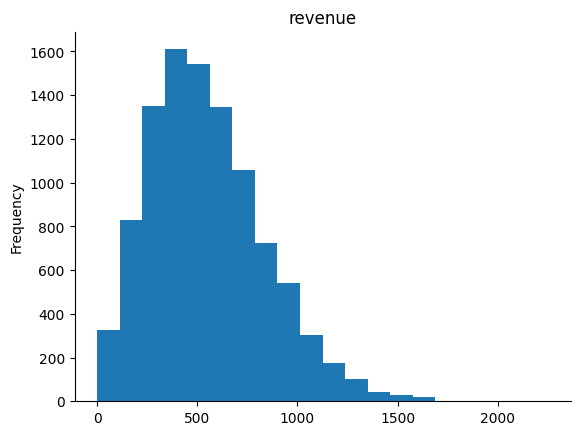

In [ ]:
# @title revenue

from matplotlib import pyplot as plt
df_general['revenue'].plot(kind='hist', bins=20, title='revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)